Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather (2).csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

In [ ]:
#upload file csv to google colab
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()
df1 = pd.read_csv(io.BytesIO(uploaded['austin_weather.csv']))


Saving austin_weather.csv to austin_weather.csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather (2).csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


---

In [ ]:
#change data type to float
df1 = df[['DewPointAvgF', 'HumidityAvgPercent', 'WindAvgMPH', 'TempAvgF']].replace('-', value = np.NaN, regex = True)
df1.fillna(method='ffill', inplace = True)
df2 = df1.astype({'DewPointAvgF': 'float', 'HumidityAvgPercent': 'float', 'WindAvgMPH': 'float', 'TempAvgF' : 'float'})

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DewPointAvgF        1319 non-null   float64
 1   HumidityAvgPercent  1319 non-null   float64
 2   WindAvgMPH          1319 non-null   float64
 3   TempAvgF            1319 non-null   float64
dtypes: float64(4)
memory usage: 41.3 KB


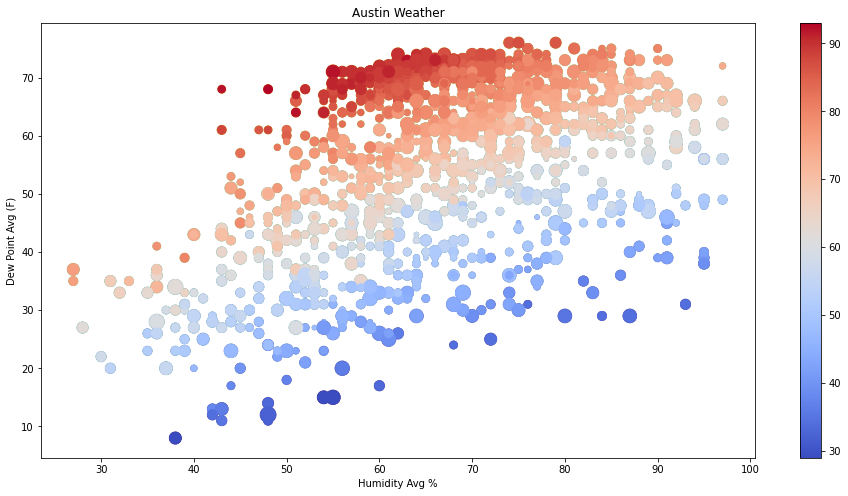

In [ ]:
#create figure
fig, ax = plt.subplots(figsize=(16,8))

sizes = 20 *  df2['WindAvgMPH']
colors = df2['TempAvgF']


# create plot
ax.scatter(df2['HumidityAvgPercent'], df2['DewPointAvgF'], c= colors, s = sizes)

# axis labeling
ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
ax.set_title('Austin Weather')

plt.colorbar(ax.scatter(df2['HumidityAvgPercent'], df2['DewPointAvgF'], c= colors, s = sizes, cmap = 'coolwarm'))
plt.show()

Insight : semakin tinggi prosentase nilai humidity maka dew average point juga semakin tinggi 

In [16]:
#session with tutot
#checking if there is column with '-' value by selcting a column
df['DewPointAvgF'].str.contains('-').sum()

#replace vale '-' to NaN
df.replace('-', np.nan, inplace=True)

#checking data
df.isnull().sum()

#fill in column NA with the value located forward it
df.fillna(method='ffill', inplace=True)

#checking data
df.isnull().sum()

#change data type to float
df = df[['DewPointAvgF', 'HumidityAvgPercent', 'WindAvgMPH', 'TempAvgF']].astype(float)

#checking data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DewPointAvgF        1319 non-null   float64
 1   HumidityAvgPercent  1319 non-null   float64
 2   WindAvgMPH          1319 non-null   float64
 3   TempAvgF            1319 non-null   float64
dtypes: float64(4)
memory usage: 41.3 KB


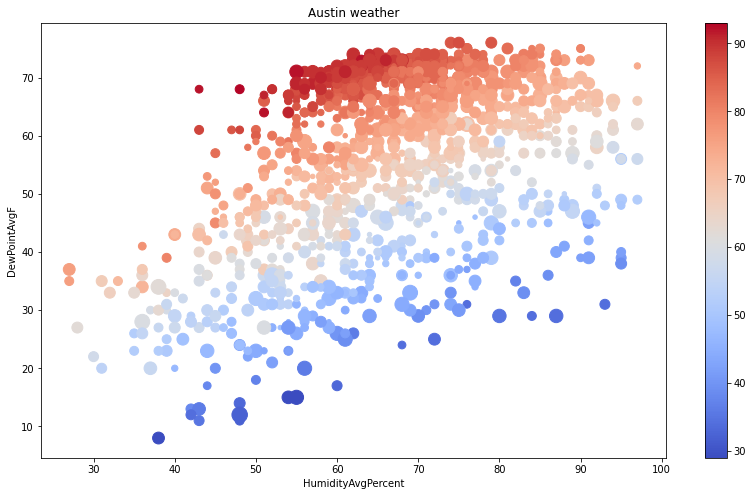

In [19]:
#create plot figure 

plt.figure(figsize=(14,8)) #adjust the picture size
plt.scatter(df['HumidityAvgPercent'], df['DewPointAvgF'], s = df['WindAvgMPH']*20, cmap='coolwarm', c = df['TempAvgF']) #create scatter plot
plt.title('Austin weather') #add title
plt.xlabel('HumidityAvgPercent') #add x label name
plt.ylabel('DewPointAvgF') #add y label name
plt.colorbar() #add colorbar in the right side
plt.show() #show scatter



---

Downoad  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales (1).csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#upload file csv to google colab
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()
df1 = pd.read_csv(io.BytesIO(uploaded['vgsales.csv']))

Saving vgsales.csv to vgsales.csv


<h2>Soal 2: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [24]:
#code here
#code here
df_group = df.groupby(['Genre'])[['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales']].mean()
df_group

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

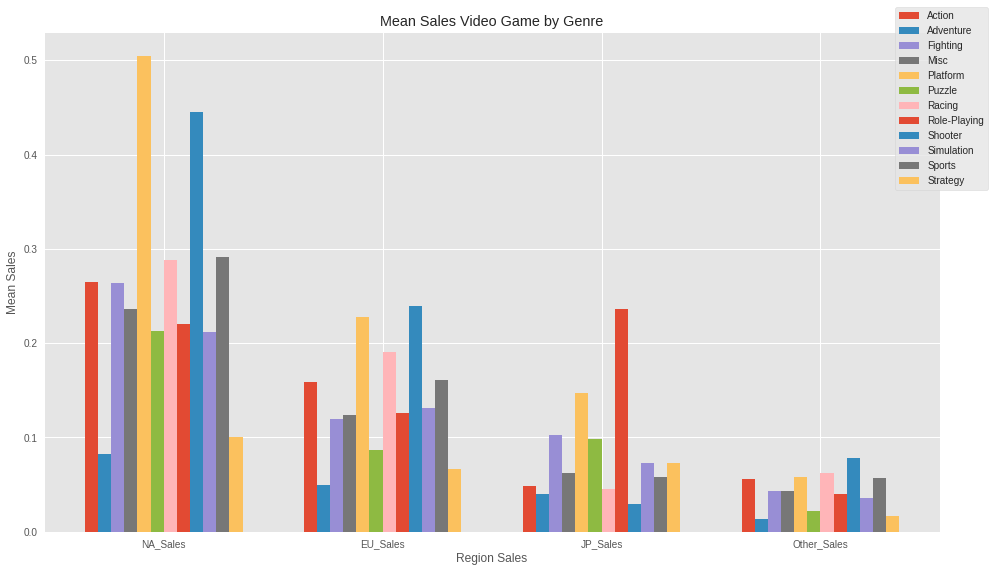

In [ ]:
#code here
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

labels = ['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales']
Action_means = list(df_group.T['Action'])
Adventure_means = list(df_group.T['Adventure'])
Fighting_means = list(df_group.T['Fighting'])
Misc_means = list(df_group.T['Misc'])
Platform_means = list(df_group.T['Platform'])
Puzzle_means = list(df_group.T['Puzzle'])
Racing_means = list(df_group.T['Racing'])
Role_Playing_means = list(df_group.T['Role-Playing'])
Shooter_means = list(df_group.T['Shooter'])
Simulation_means = list(df_group.T['Simulation'])
Sports_means = list(df_group.T['Sports'])
Strategy_means = list(df_group.T['Strategy'])


x = np.arange(len(labels))  # the label locations
margin = 0.05

width = 0.06  # the width of the bars

fig, ax = plt.subplots(figsize = (14,8))
rects1 = ax.bar(x - width/2, Action_means, width, label='Action')
rects2 = ax.bar(x + width/2, Adventure_means, width, label='Adventure')
rects3 = ax.bar(x + 3*width/2, Fighting_means, width, label='Fighting')
rects4 = ax.bar(x + 5*width/2, Misc_means, width, label='Misc')
rects5 = ax.bar(x + 7*width/2, Platform_means, width, label='Platform')
rects6 = ax.bar(x + 9*width/2, Puzzle_means, width, label='Puzzle')
rects7 = ax.bar(x + 11*width/2, Racing_means, width, label='Racing')
rects8 = ax.bar(x + 13*width/2, Role_Playing_means, width, label='Role-Playing')
rects9 = ax.bar(x + 15*width/2, Shooter_means, width, label='Shooter')
rects10 = ax.bar(x + 17*width/2, Simulation_means, width, label='Simulation')
rects11 = ax.bar(x + 19*width/2, Sports_means, width, label='Sports')
rects12 = ax.bar(x + 21*width/2, Strategy_means, width, label='Strategy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Sales')
ax.set_xlabel('Region Sales')
ax.set_title('Mean Sales Video Game by Genre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xticks(x+0.3)
plt.legend(bbox_to_anchor=(0.95, 1.05), frameon=1, loc='upper left', borderaxespad=0.)



fig.tight_layout()

plt.show()


Jawab:
Penjualan  tertinggi untuk masing-masing region terlihat bervariasi, untuk region NA tertinggi Plaftorm, EU shooter, JP role playing , dan Other adalah shooter. Sedangkan penjualan terendah untuk region NA, EU, dan other adalah adventure, sedangkan untuk JP penjulan terendah adalah role playing.
Untuk tiap2 genre di masing-masing region jumlah penjualan sangat bervariasi.  Penjualan di region NA relatif lebih tinggi jika dibandingkan dengan region lainnya, sedangkan penjualan di other region relatif lebih rendah dibanding 3 region lainnya.

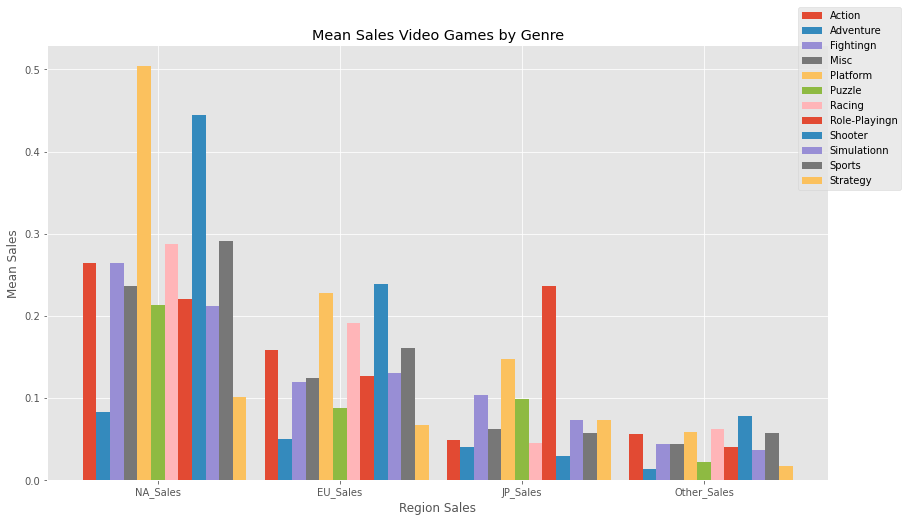

In [39]:
#session with tutor 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

#transform dataframe
df_T = df_group.T
df_T #display df_T

fig, ax = plt.subplots(figsize = (14,8)) #define figure size

x = np.arange(0,16,4) #define x-axis length
width = 0.3 #defne width
#define y
y = df_T['Action']
y1 = df_T['Adventure']
y2 = df_T['Fighting']
y3 = df_T['Misc']
y4 = df_T['Platform']
y5 = df_T['Puzzle']
y6 = df_T['Racing']
y7 = df_T['Role-Playing']
y8 = df_T['Shooter']
y9 = df_T['Simulation']
y10 = df_T['Sports']
y11 = df_T['Strategy']

#define bar plot for each genre
ax.bar(x, y, width, label = 'Action')
ax.bar(x+0.3, y1, width, label = 'Adventure')
ax.bar(x+0.6, y2, width, label = 'Fightingn')
ax.bar(x+0.9, y3, width, label = 'Misc')
ax.bar(x+1.2, y4, width, label = 'Platform')
ax.bar(x+1.5, y5, width, label = 'Puzzle')
ax.bar(x+1.8, y6, width, label = 'Racing')
ax.bar(x+2.1, y7, width, label = 'Role-Playingn')
ax.bar(x+2.4, y8, width, label = 'Shooter')
ax.bar(x+2.7, y9, width, label = 'Simulationn')
ax.bar(x+3.0, y10, width, label = 'Sports')
ax.bar(x+3.3, y11, width, label = 'Strategy')

ax.set_xticks(x+1.5) #set label for x / genre so that it located in the center
ax.set_xticklabels(df_T.index) #set label name to replace number 
ax.set_xlabel('Region Sales') #set x-axis label
ax.set_ylabel('Mean Sales') #set y-axis label
ax.legend(bbox_to_anchor = (1.1, 1.1)) #set position of legend


plt.title('Mean Sales Video Games by Genre') #set title
plt.show()

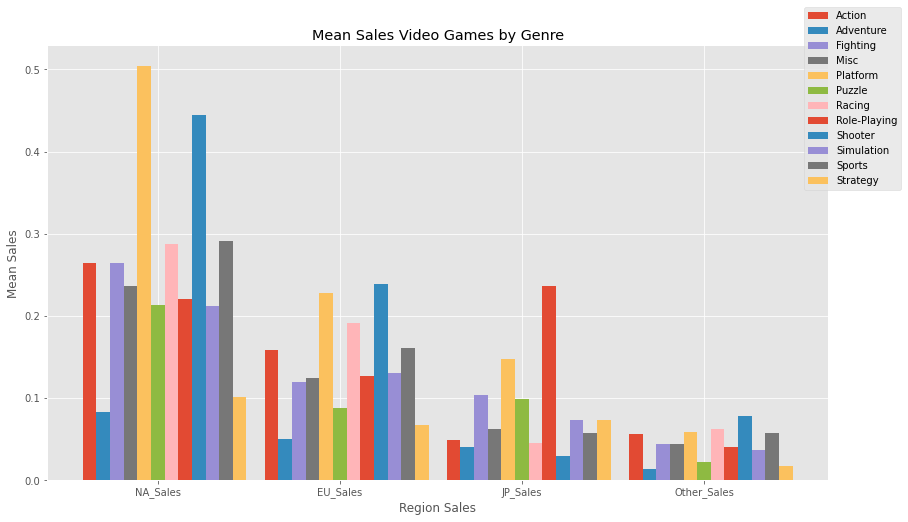

In [44]:
#using for loop
#session with tutor 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

#transform dataframe
df_T = df_group.T
df_T #display df_T

fig, ax = plt.subplots(figsize = (14,8)) #define figure size

x = np.arange(0,16,4) #define x-axis length
width = 0.3 #defne width

for i, j in enumerate(df_T.columns):
  ax.bar(x+(i*width), df_T[j], width, label = j)

ax.set_xticks(x+1.5) #set label for x / genre so that it located in the center
ax.set_xticklabels(df_T.index) #set label name to replace number 
ax.set_xlabel('Region Sales') #set x-axis label
ax.set_ylabel('Mean Sales') #set y-axis label
ax.legend(bbox_to_anchor = (1.1, 1.1)) #set position of legend


plt.title('Mean Sales Video Games by Genre') #set title
plt.show()

'Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

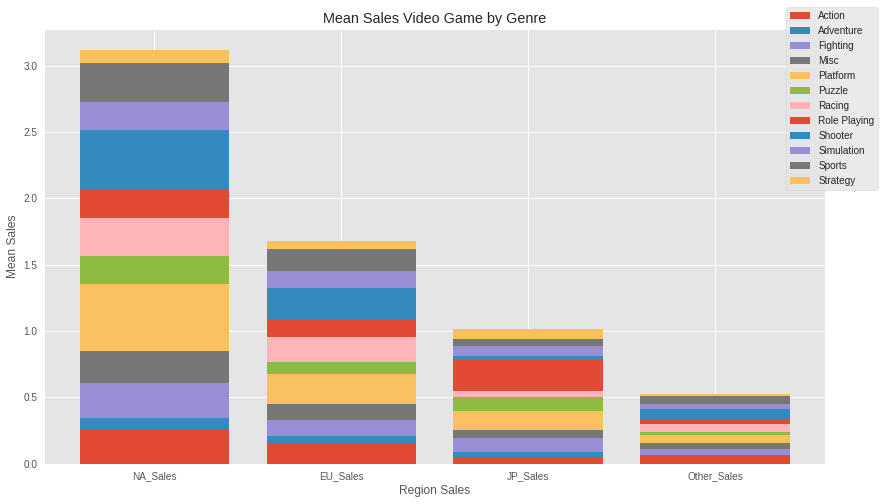

In [ ]:
#code here
fig, ax = plt.subplots(figsize=(14,8))
width = 0.8 # the width of the bars
x = np.arange(len(labels))
plt.style.use('ggplot')

labels = ['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales']
Action_means = list(df_group.T['Action'])
Adventure_means = list(df_group.T['Adventure'])
Fighting_means = list(df_group.T['Fighting'])
Misc_means = list(df_group.T['Misc'])
Platform_means = list(df_group.T['Platform'])
Puzzle_means = list(df_group.T['Puzzle'])
Racing_means = list(df_group.T['Racing'])
Role_Playing_means = list(df_group.T['Role-Playing'])
Shooter_means = list(df_group.T['Shooter'])
Simulation_means = list(df_group.T['Simulation'])
Sports_means = list(df_group.T['Sports'])
Strategy_means = list(df_group.T['Strategy'])

Fighting_means_add = np.add(Action_means, Adventure_means).tolist()
Misc_means_add = np.add(Fighting_means_add, Fighting_means).tolist()
Platform_means_add = np.add(Misc_means_add, Misc_means).tolist()
Puzzle_means_add = np.add(Platform_means_add, Platform_means).tolist()
Racing_means_add = np.add(Puzzle_means_add, Puzzle_means).tolist()
Role_Playing_means_add = np.add(Racing_means_add, Racing_means).tolist()
Shooter_means_add = np.add(Role_Playing_means_add, Role_Playing_means).tolist()
Simulation_means_add = np.add(Shooter_means_add, Shooter_means).tolist()
Sports_means_add = np.add(Simulation_means_add, Simulation_means).tolist()
Strategy_means_add = np.add(Sports_means_add, Sports_means ).tolist()



ax.bar(labels, Action_means, width, label='Action')
ax.bar(labels, Adventure_means, width, bottom=Action_means, label='Adventure')
ax.bar(labels, Fighting_means, width, bottom=Fighting_means_add , label='Fighting')
ax.bar(labels, Misc_means, width, bottom=Misc_means_add , label='Misc')
ax.bar(labels, Platform_means, width, bottom=Platform_means_add , label='Platform')
ax.bar(labels, Puzzle_means, width, bottom=Puzzle_means_add , label='Puzzle')
ax.bar(labels, Racing_means, width, bottom=Racing_means_add , label='Racing')
ax.bar(labels, Role_Playing_means, width, bottom=Role_Playing_means_add , label='Role Playing')
ax.bar(labels, Shooter_means, width, bottom=Shooter_means_add , label='Shooter')
ax.bar(labels, Simulation_means, width, bottom=Simulation_means_add , label='Simulation')
ax.bar(labels, Sports_means, width, bottom=Sports_means_add , label='Sports')
ax.bar(labels, Strategy_means, width, bottom=Strategy_means_add , label='Strategy')


ax.set_ylabel('Mean Sales')
ax.set_xlabel('Region Sales')
ax.set_title('Mean Sales Video Game by Genre')
plt.legend(bbox_to_anchor=(0.95, 1.05), frameon=1, loc='upper left', borderaxespad=0.)
plt.show()


Jawab:

Penualan rata-rata terbanyak terjadi di region NA, sedangkan paling sedikit di other region. Di region NA penjualan didominasi olej genre platform dan shooter, di region EU platform dan shooter juga, sedangkan di region JP didominasi role playing, dan di other region didominasi shooter.

In [46]:
x = df_T.index
x

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

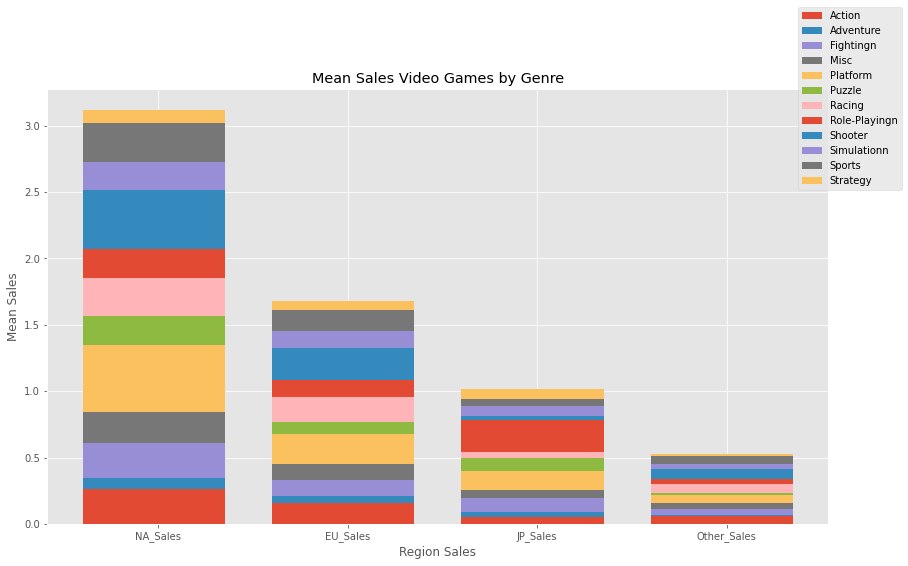

In [64]:
#session with tutor

fig, ax = plt.subplots(figsize=(14,8))
x = df_T.index
plt.style.use('ggplot')

#define bottom
y_bottom = 0

x = np.arange(0,16,4) #define x-axis length
width = 3 #defne width
#define y
y = df_T['Action']
y1 = df_T['Adventure']
y2 = df_T['Fighting']
y3 = df_T['Misc']
y4 = df_T['Platform']
y5 = df_T['Puzzle']
y6 = df_T['Racing']
y7 = df_T['Role-Playing']
y8 = df_T['Shooter']
y9 = df_T['Simulation']
y10 = df_T['Sports']
y11 = df_T['Strategy']

#define for each genre
ax.bar(x, y,  width,  y_bottom, label = 'Action')
ax.bar(x, y1, width, y_bottom+y, label = 'Adventure')
ax.bar(x, y2, width, y_bottom+y+y1, label = 'Fightingn')
ax.bar(x, y3, width, y_bottom+y+y1+y2, label = 'Misc')
ax.bar(x, y4, width, y_bottom+y+y1+y2+y3, label = 'Platform')
ax.bar(x, y5, width, y_bottom+y+y1+y2+y3+y4, label = 'Puzzle')
ax.bar(x, y6, width, y_bottom+y+y1+y2+y3+y4+y5, label = 'Racing')
ax.bar(x, y7, width, y_bottom+y+y1+y2+y3+y4+y5+y6, label = 'Role-Playingn')
ax.bar(x, y8, width, y_bottom+y+y1+y2+y3+y4+y5+y6+y7, label = 'Shooter')
ax.bar(x, y9, width, y_bottom+y+y1+y2+y3+y4+y5+y6+y7+y8,label = 'Simulationn')
ax.bar(x, y10, width, y_bottom+y+y1+y2+y3+y4+y5+y6+y7+y8+y9,label = 'Sports')
ax.bar(x, y11, width, y_bottom+y+y1+y2+y3+y4+y5+y6+y7+y8+y9+y10, label = 'Strategy')


ax.set_xticks(x+0.1) #set label for x / genre so that it located in the center
ax.set_xticklabels(df_T.index) #set label name to replace number 
ax.set_xlabel('Region Sales') #set x-axis label
ax.set_ylabel('Mean Sales') #set y-axis label
ax.legend(bbox_to_anchor = (1.1, 1.2)) #set position of legend


plt.title('Mean Sales Video Games by Genre') #set title
plt.show()


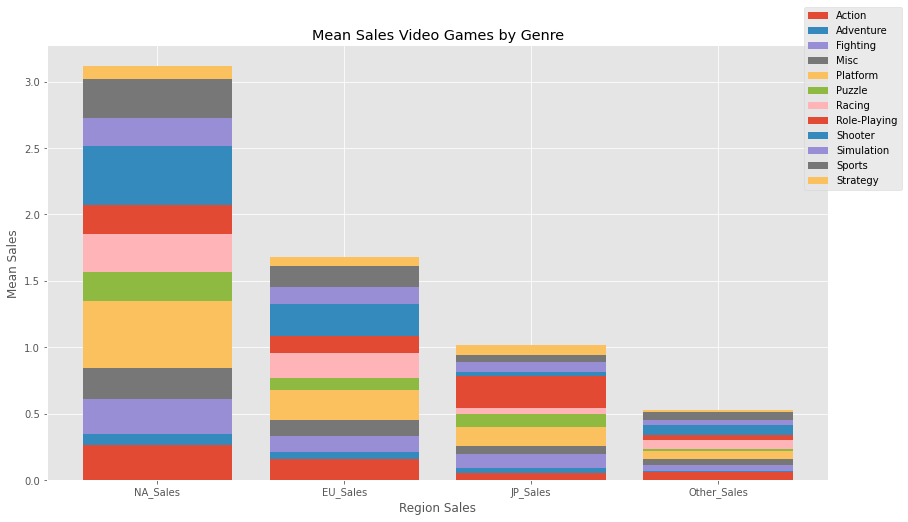

In [79]:
#session with tutor 
#with for loop
#using for loop
#session with tutor 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


#define bottom
y_bottom = 0
x = df_T.index

width = 0.8 #defne width

fig, ax = plt.subplots(figsize = (14,8)) #define figure size


for i, j in enumerate(df_T.columns):
  ax.bar(x, df_T[j], width, y_bottom, label = j)
  y_bottom += df_T[j]

#ax.set_xticks(x+0.1) #set label for x / genre so that it located in the center
ax.set_xticklabels(df_T.index) #set label name to replace number 
ax.set_xlabel('Region Sales') #set x-axis label
ax.set_ylabel('Mean Sales') #set y-axis label
ax.legend(bbox_to_anchor = (1.1, 1.1)) #set position of legend


plt.title('Mean Sales Video Games by Genre') #set title
plt.show()

Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)